In [21]:
import linopy
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
from shapely import wkt
import numpy as np

In [22]:
mwperkm2_wind = 4.5 ## originally 9 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET
mwperkm2_solar = 15 ## originally 30 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET

maxcapacityfor_spp = 90
maxcapacityfor_vspp = 10

radius_spp_wind = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_wind * 3.14)) / 100,5)
radius_vspp_wind = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_wind * 3.14)) / 100,5)

radius_spp_solar = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_solar * 3.14)) / 100,5)
radius_vspp_solar = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_solar * 3.14)) / 100,5)

print('radius_spp_wind km = ',radius_spp_wind*100,' buffer = ',radius_spp_wind)
print('radius_vspp_wind km = ',radius_vspp_wind*100,' buffer = ',radius_vspp_wind)
print('radius_spp_solar km = ',radius_spp_solar*100,' buffer = ',radius_spp_solar)
print('radius_vspp_solar km = ',radius_vspp_solar*100,' buffer = ',radius_vspp_solar)

radius_spp_wind km =  2.524  buffer =  0.02524
radius_vspp_wind km =  0.8410000000000001  buffer =  0.00841
radius_spp_solar km =  1.3820000000000001  buffer =  0.01382
radius_vspp_solar km =  0.461  buffer =  0.00461


In [23]:
scenario_SI = 0

xr_out = xr.open_dataset('Output\\xr_output_scenario_SI_' + str(scenario_SI) + '_.nc')
print(xr_out)
print("cap_wind = ",xr_out['cap_wind'].sum())
print("cap_solar = ",xr_out['cap_solar'].sum())

<xarray.Dataset>
Dimensions:    (lat: 356, lon: 199)
Coordinates:
  * lat        (lat) float64 5.635 5.676 5.718 5.76 ... 20.3 20.34 20.38 20.43
  * lon        (lon) float64 97.37 97.41 97.45 97.49 ... 105.5 105.5 105.6 105.6
Data variables:
    SI_Solar   (lat, lon) float64 ...
    SI_Wind    (lat, lon) float64 ...
    AVA_Wind   (lat, lon) float32 ...
    AVA_Solar  (lat, lon) float32 ...
    ADM1_EN    (lat, lon) object ...
    region     (lat, lon) object ...
    cap_wind   (lat, lon) float64 ...
    cap_solar  (lat, lon) float64 ...
cap_wind =  <xarray.DataArray 'cap_wind' ()>
array(29531.79287025)
cap_solar =  <xarray.DataArray 'cap_solar' ()>
array(1168487.18905584)


In [24]:
df_wind = xr_out.to_dataframe()
xr_out.close()
df_wind.reset_index(inplace=True)
df_wind = gpd.GeoDataFrame(df_wind, geometry =gpd.points_from_xy(df_wind['lon'],df_wind['lat']))
df_wind.crs = {'init': 'epsg:4326'}
print(len(df_wind))
for i,c in enumerate(df_wind.columns):
    if c not in (['lon','lat','SI_Wind','SI_Wind_max','SI_Wind_min','region','ADM1_EN','cap_wind','AVA_Wind','geometry']):
        df_wind = df_wind.drop(columns=c)

df_wind = df_wind.loc[df_wind['cap_wind'] > 0]
df_wind.reset_index(inplace=True,drop=False)
df_wind.crs = {'init': 'epsg:4326'}
df_wind['buffer'] = df_wind['geometry'].buffer(np.round(np.sqrt(df_wind['cap_wind']/(mwperkm2_wind * 3.14)) / 100,5),cap_style = 3)
df_wind = df_wind.set_geometry('buffer')

df_wind.to_csv('Output\\Output_wind_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_wind)

70844
      index        lat         lon   SI_Wind  AVA_Wind     ADM1_EN region  \
0      3471   6.343056  101.031944  0.118895      1.89        Yala     R3   
1      3474   6.343056  101.156944  0.051496      0.90        Yala     R3   
2      3667   6.384722  100.906944  0.033940      0.54        Yala     R3   
3      3670   6.384722  101.031944  0.238350      3.51        Yala     R3   
4      3671   6.384722  101.073611  0.021837      0.36        Yala     R3   
...     ...        ...         ...       ...       ...         ...    ...   
1168  68131  19.884722  100.406944  0.082183      1.62  Chiang Rai     R4   
1169  68135  19.884722  100.573611  0.144075      3.06  Chiang Rai     R4   
1170  68323  19.926389  100.115278  0.534836      9.18  Chiang Rai     R4   
1171  68333  19.926389  100.531944  0.024734      0.54  Chiang Rai     R4   
1172  68334  19.926389  100.573611  0.143808      3.06  Chiang Rai     R4   

       cap_wind                    geometry  \
0      8.505000   POIN

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_32376\3128496745.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use '

In [25]:
df_solar = xr_out.to_dataframe()
df_solar.reset_index(inplace=True)
df_solar = gpd.GeoDataFrame(df_solar, geometry =gpd.points_from_xy(df_solar['lon'],df_solar['lat']))
df_solar.crs = {'init': 'epsg:4326'}
print(len(df_solar))
for i,c in enumerate(df_solar.columns):
    if c not in (['lon','lat','SI_Solar','SI_Solar_max','SI_Solar_min','region','ADM1_EN','cap_solar','AVA_Solar','geometry']):
        df_solar = df_solar.drop(columns=c)

df_solar = df_solar.loc[df_solar['cap_solar'] > 0]
df_solar.reset_index(inplace=True,drop=False)
df_solar.crs = {'init': 'epsg:4326'}
df_solar['buffer'] = df_solar['geometry'].buffer(np.round(np.sqrt(df_solar['cap_solar']/(mwperkm2_solar * 3.14)) / 100,5),cap_style = 3)
df_solar = df_solar.set_geometry('buffer')

df_solar.to_csv('Output\\Output_solar_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_solar)

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\EGAT\AppData\Local\Temp\ipykernel_32376\4263331687.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use '

70844
       index        lat         lon  SI_Solar  AVA_Solar     ADM1_EN region  \
0        887   5.801389  101.156944  0.007050       0.09        Yala     R3   
1       1302   5.884722  101.865278  0.151031       1.35  Narathiwat     R3   
2       1500   5.926389  101.823611  0.067061       0.63  Narathiwat     R3   
3       1501   5.926389  101.865278  0.343263       3.15  Narathiwat     R3   
4       1502   5.926389  101.906944  0.121081       1.17  Narathiwat     R3   
...      ...        ...         ...       ...        ...         ...    ...   
14673  70511  20.384722  100.073611  0.209869       2.07  Chiang Rai     R4   
14674  70512  20.384722  100.115278  0.250458       2.43  Chiang Rai     R4   
14675  70513  20.384722  100.156944  0.086556       0.99  Chiang Rai     R4   
14676  70514  20.384722  100.198611  0.069576       0.72  Chiang Rai     R4   
14677  70711  20.426389  100.115278  0.173840       1.71  Chiang Rai     R4   

       cap_solar                    geometry 

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


total wind capacity =  29531.7928702542
R0 wind =  0.0
R1 wind =  5275.125415340481
R2 wind =  6076.21560716627
R3 wind =  15519.19661942167
R4 wind =  2661.2552283257805


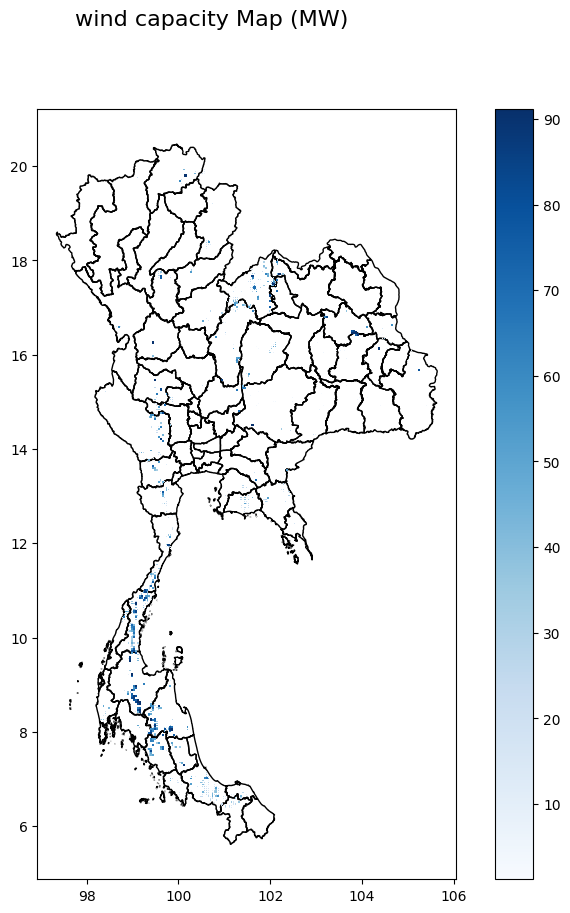

In [26]:
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}

print("total wind capacity = ", df_wind['cap_wind'].sum())
print("R0 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R0'].sum())
print("R1 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R1'].sum())
print("R2 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R2'].sum())
print("R3 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R3'].sum())
print("R4 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('wind capacity Map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_wind.plot(ax = ax,legend=True,zorder = 1,column = 'cap_wind',cmap = 'Blues')
except:
    None

total solar capacity =  1168487.189055836
R0 Solar =  5213.70053529559
R1 Solar =  247147.22081690765
R2 Solar =  508177.831608213
R3 Solar =  128451.16060138079
R4 Solar =  279497.2754940388


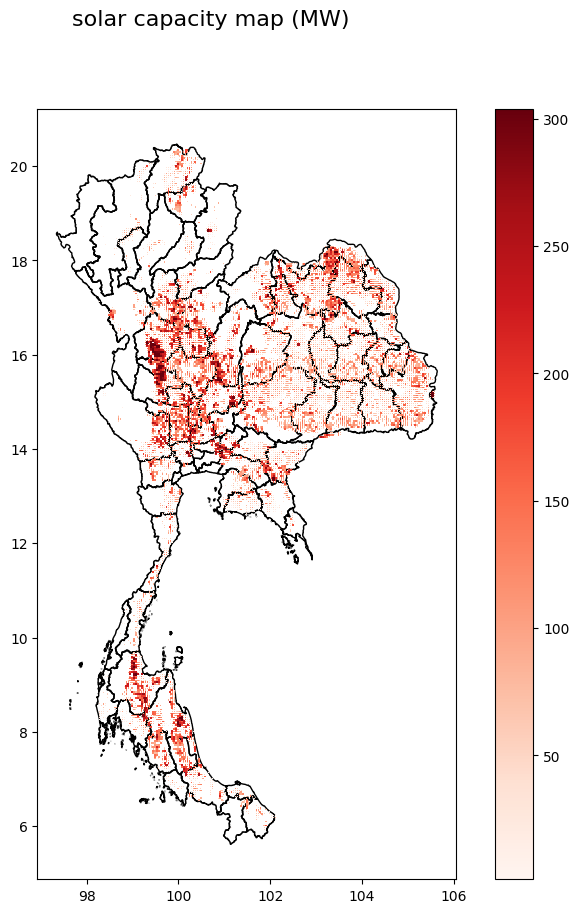

In [27]:
print("total solar capacity = ", df_solar['cap_solar'].sum())
print("R0 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R0'].sum())
print("R1 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R1'].sum())
print("R2 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R2'].sum())
print("R3 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R3'].sum())
print("R4 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('solar capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_solar.plot(ax = ax,legend=True,zorder = 1,column = 'cap_solar',cmap = 'Reds')
except:
    None


In [28]:
region = pd.read_csv('Data\\Region.csv',index_col=False)
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}
list_region = []
count = 0
for i in thailandmap['ADM1_TH']:
    r = region['region'].loc[region['province'] == i]
    try : 
        # print(i,r.values[0])
        list_region.append(r.values[0])
    except :
        print(i,'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
        list_region.append('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
thailandmap['region'] = list_region

c:\Users\EGAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


total wind capacity =  6076.21560716627
total solar capacity =  508177.831608213


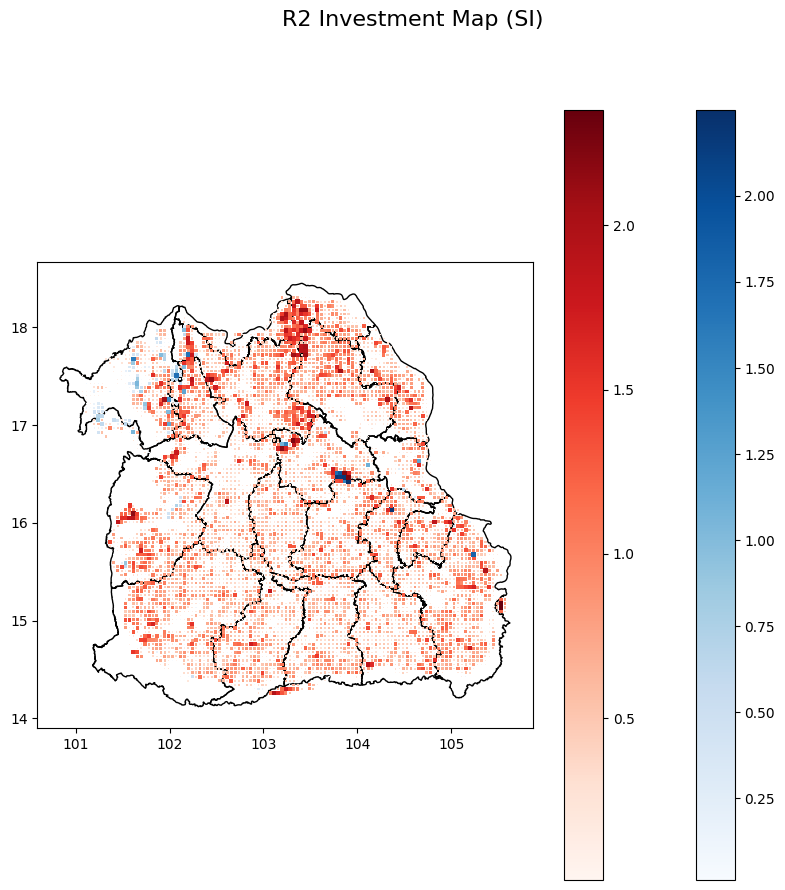

In [29]:
region = 'R2'
specificarea = thailandmap.loc[thailandmap['region'] == region]
bound = specificarea.unary_union.bounds

print("total wind capacity = ", df_wind['cap_wind'].loc[df_wind['region'] == region].sum())

print("total solar capacity = ", df_solar['cap_solar'].loc[df_solar['region'] == region].sum())


fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(region + ' Investment Map (SI)', fontsize=16)
specificarea.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
try:
    df_wind.loc[df_wind['region'] == region].plot(ax = ax,legend=True,zorder = 1,column = 'SI_Wind',cmap = 'Blues')
except:
    None
try:
    df_solar.loc[df_solar['region'] == region].plot(ax = ax,legend=True,zorder = 3,column = 'SI_Solar',cmap = 'Reds')
except:
    None


total wind capacity =  6076.21560716627
total solar capacity =  508177.831608213


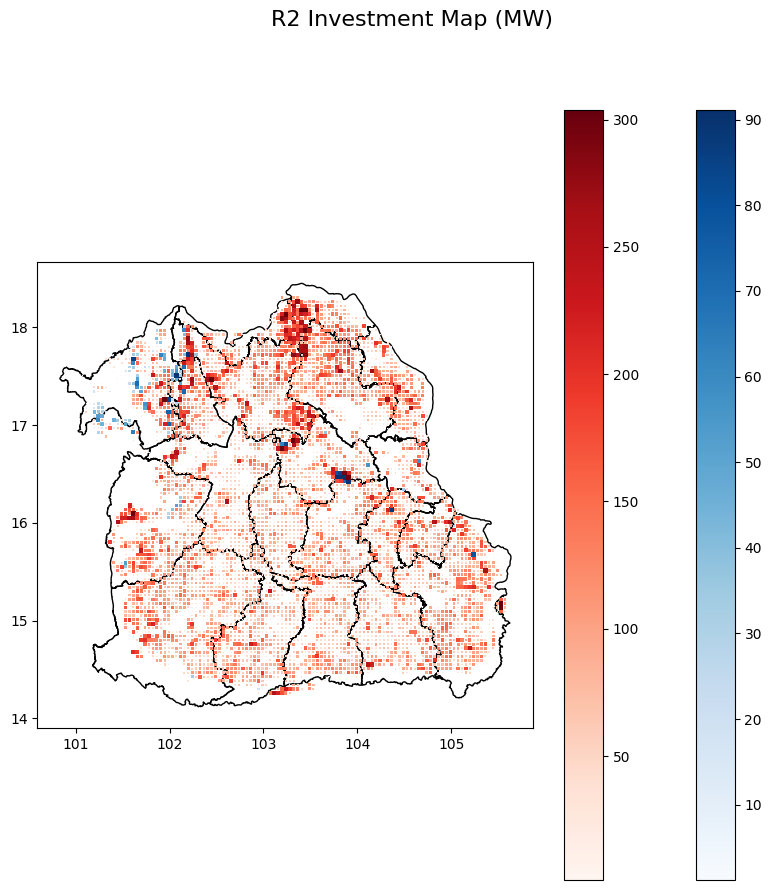

In [30]:
print("total wind capacity = ", df_wind['cap_wind'].loc[df_wind['region'] == region].sum())

print("total solar capacity = ", df_solar['cap_solar'].loc[df_solar['region'] == region].sum())


fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(region + ' Investment Map (MW)', fontsize=16)
specificarea.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
try:
    df_wind.loc[df_wind['region'] == region].plot(ax = ax,legend=True,zorder = 1,column = 'cap_wind',cmap = 'Blues')
except:
    None
try:
    df_solar.loc[df_solar['region'] == region].plot(ax = ax,legend=True,zorder = 3,column = 'cap_solar',cmap = 'Reds')
except:
    None